In [173]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
train_data = pd.read_csv('./Input/train.csv')
test_data = pd.read_csv('./Input/test.csv')

In [176]:
train_data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [177]:
train_data.loc[train_data['grade'] == 3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2302,2302,20150225T000000,262000.0,1,0.75,520,12981,1.0,0,0,5,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233
4123,4123,20141104T000000,280000.0,1,0.00,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549


In [4]:
y = train_data['price']

In [5]:
train_data.drop('price', axis=1, inplace=True)

In [6]:
train_data.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [7]:
y.head(5)

0    221900.0
1    180000.0
2    510000.0
3    257500.0
4    291850.0
Name: price, dtype: float64

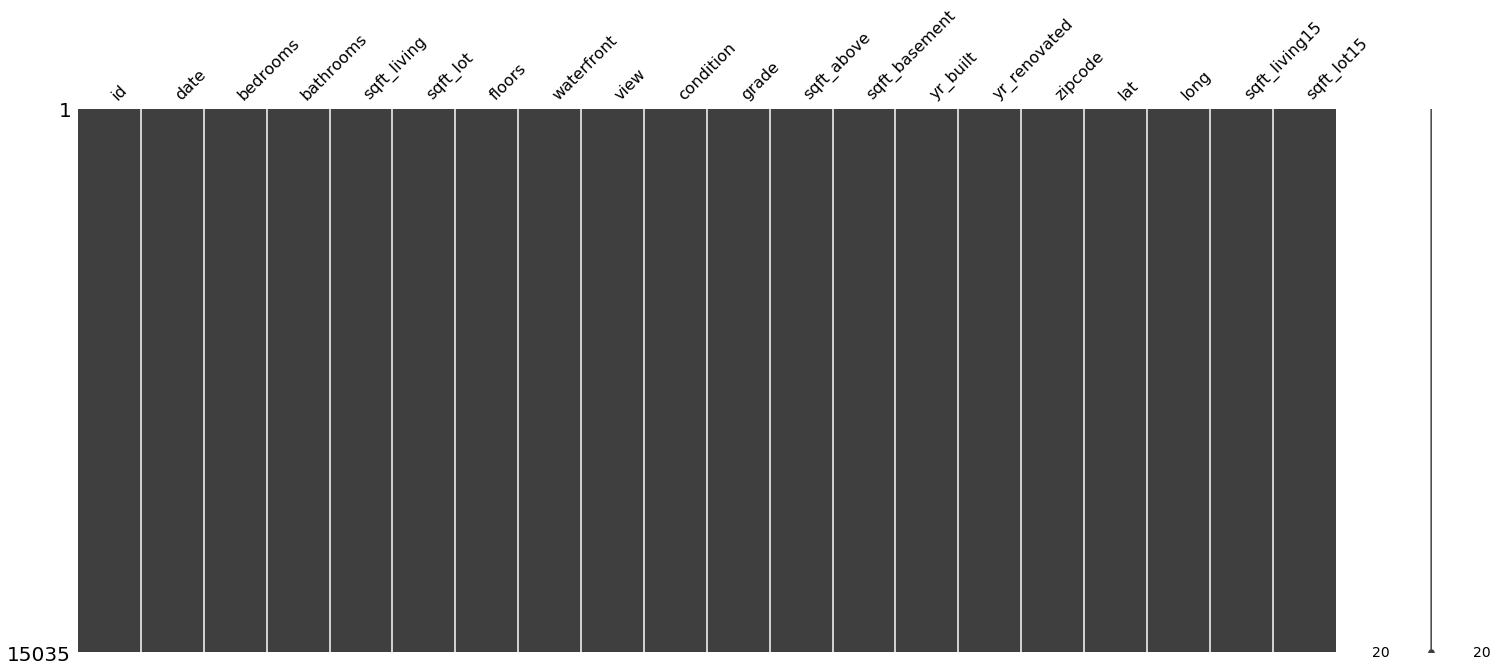

In [8]:
msno.matrix(train_data) # 결측치 확인

In [9]:
for item in train_data.columns:
    print('{}: {}'.format(item, len(train_data.loc[pd.isnull(train_data[item]), item].values)))

id: 0
date: 0
bedrooms: 0
bathrooms: 0
sqft_living: 0
sqft_lot: 0
floors: 0
waterfront: 0
view: 0
condition: 0
grade: 0
sqft_above: 0
sqft_basement: 0
yr_built: 0
yr_renovated: 0
zipcode: 0
lat: 0
long: 0
sqft_living15: 0
sqft_lot15: 0


In [10]:
temp_id = train_data['id']
train_data.drop('id', axis=1, inplace=True)

In [11]:
train_data['date'] = train_data['date'].apply(lambda x: str(x[2:6])).astype(str)

In [12]:
train_data['date']

0        1410
1        1502
2        1502
3        1406
4        1501
5        1504
6        1405
7        1405
8        1410
9        1503
10       1501
11       1407
12       1405
13       1412
14       1504
15       1405
16       1408
17       1405
18       1411
19       1411
20       1406
21       1412
22       1411
23       1406
24       1411
25       1412
26       1406
27       1412
28       1502
29       1406
         ... 
15005    1405
15006    1505
15007    1405
15008    1405
15009    1411
15010    1501
15011    1406
15012    1405
15013    1410
15014    1411
15015    1406
15016    1408
15017    1410
15018    1503
15019    1411
15020    1409
15021    1405
15022    1503
15023    1410
15024    1408
15025    1504
15026    1409
15027    1410
15028    1504
15029    1408
15030    1410
15031    1503
15032    1405
15033    1502
15034    1410
Name: date, Length: 15035, dtype: object

In [13]:
train_data.head(5)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,1502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,1406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,1501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [14]:
temp_id.head(5)

0    0
1    1
2    2
3    3
4    4
Name: id, dtype: int64

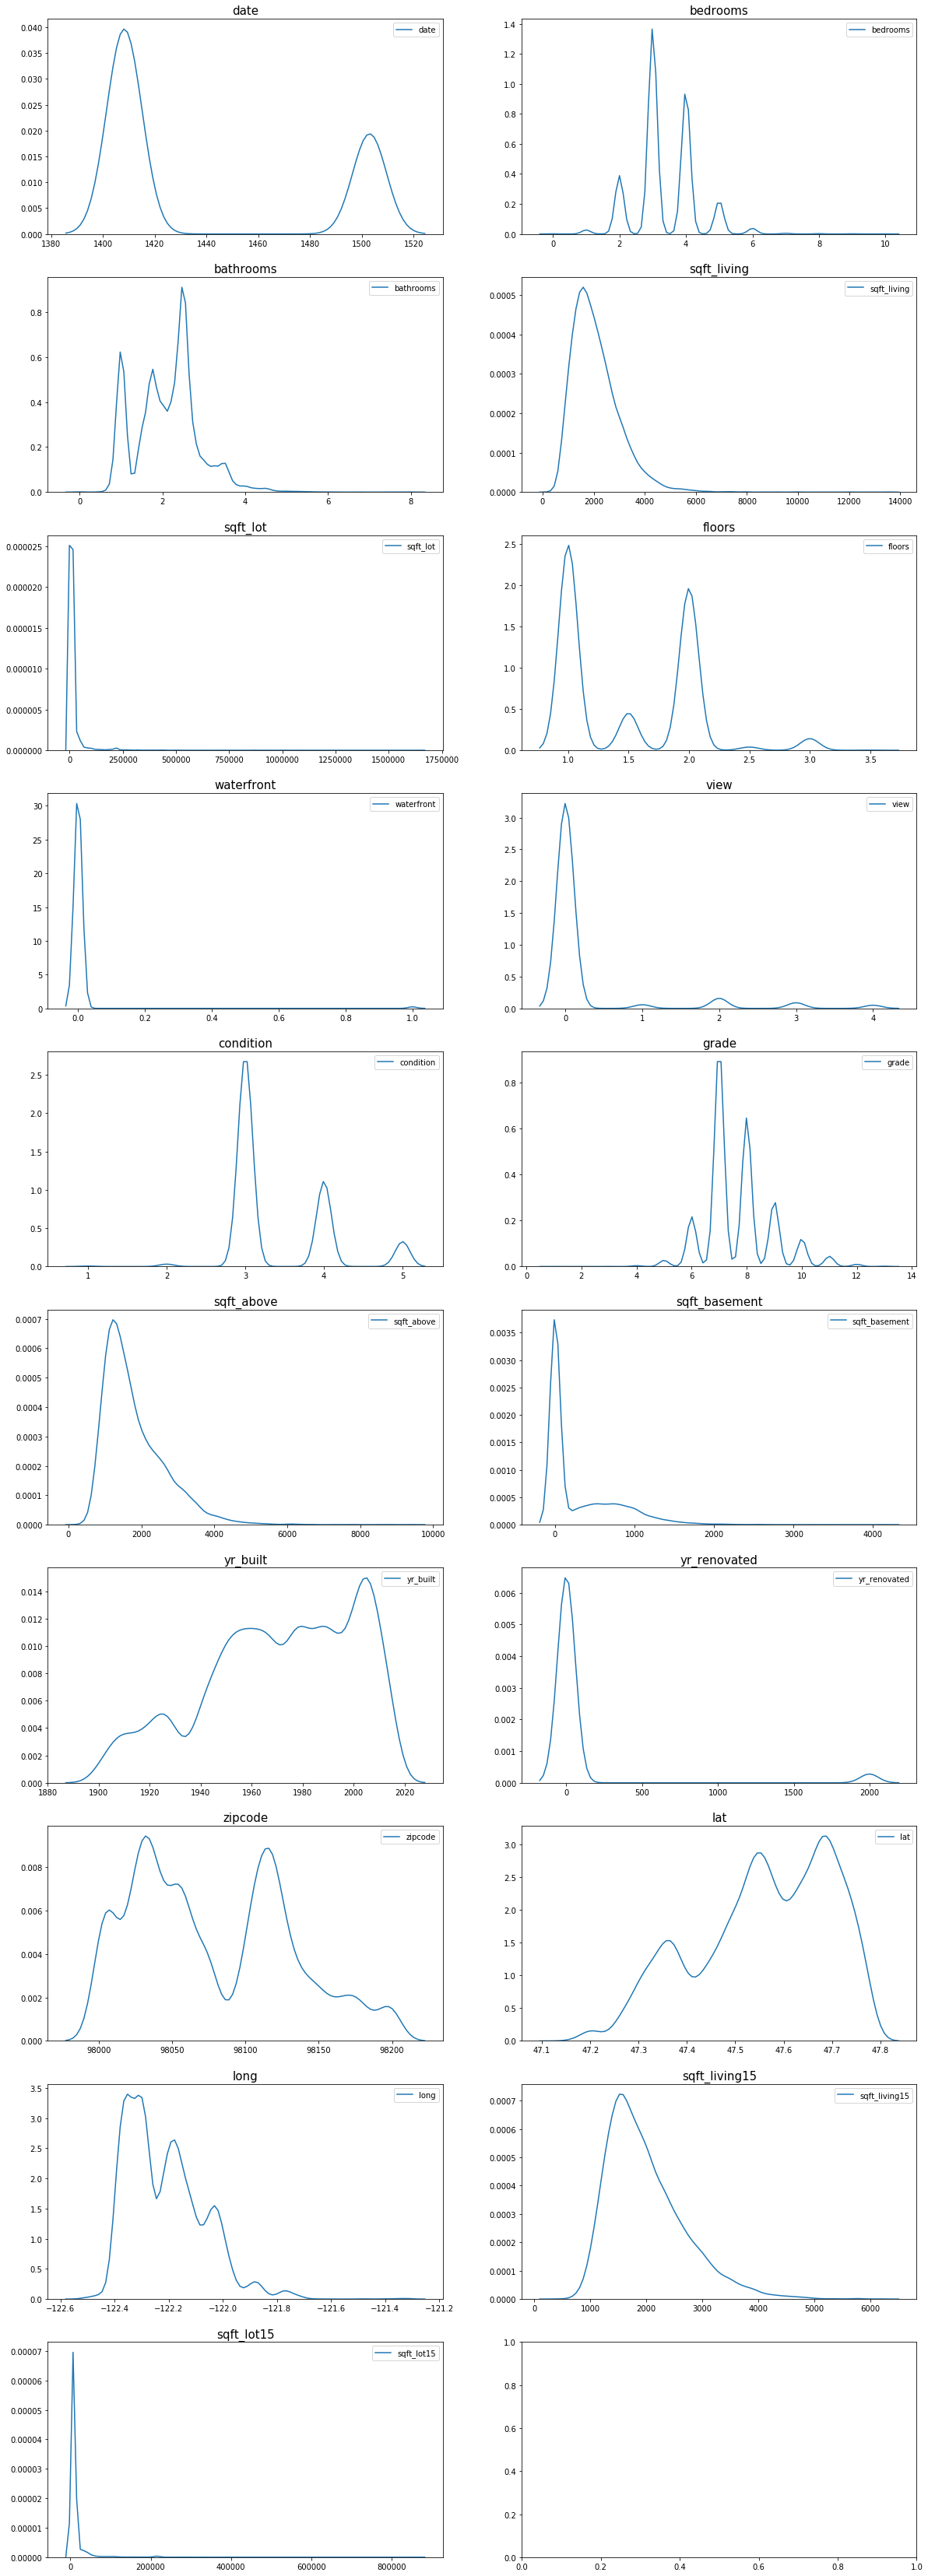

In [15]:
fig, ax = plt.subplots(10, 2, figsize=(20, 60))

count = 0
columns = train_data.columns
for row in range(10):
    for col in range(2):
        sns.kdeplot(train_data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1
        if count == 19:
            break

In [16]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns:
    train_data[c] = np.log1p(train_data[c].values)

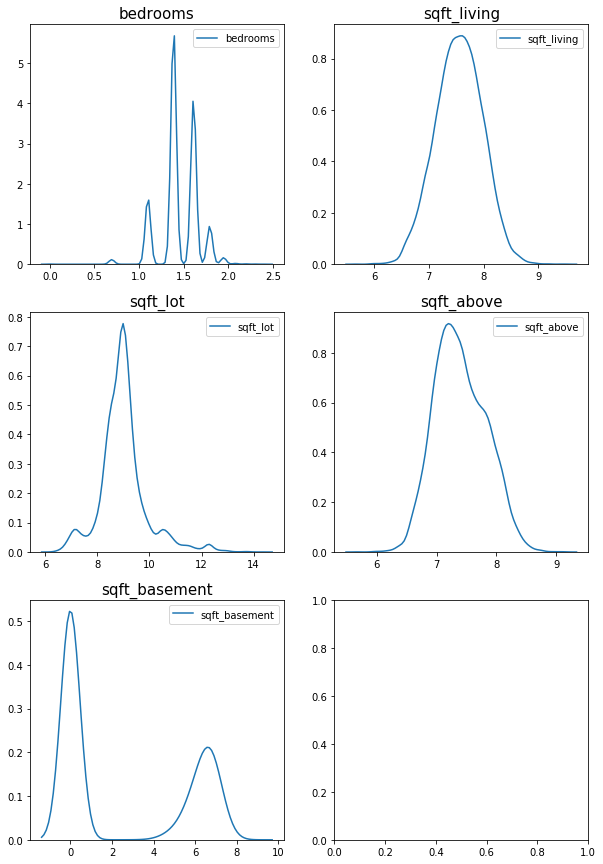

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))

count = 0
for row in range(3):
    for col in range(2):
        if count == 5:
            break
        sns.kdeplot(train_data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count+=1

In [18]:
sub = train_data.iloc[len(train_data):, :]
x = train_data.iloc[:len(train_data), :]

In [19]:
x.head(5)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1410,1.386294,1.00,7.074117,8.639588,1.0,0,0,3,7,7.074117,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,1502,1.098612,1.00,6.647688,9.210440,1.0,0,0,3,6,6.647688,0.0,1933,0,98028,47.7379,-122.233,2720,8062
2,1502,1.386294,2.00,7.427144,8.997271,1.0,0,0,3,8,7.427144,0.0,1987,0,98074,47.6168,-122.045,1800,7503
3,1406,1.386294,2.25,7.447751,8.827615,2.0,0,0,3,7,7.447751,0.0,1995,0,98003,47.3097,-122.327,2238,6819
4,1501,1.386294,1.50,6.966967,9.181118,1.0,0,0,3,7,6.966967,0.0,1963,0,98198,47.4095,-122.315,1650,9711


In [1]:
import numpy as np
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

from keras import models
from keras import layers

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(units=32, activation='relu'))
    model.add(layers.Dense(units=1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# Data Load
df_train = pd.read_csv('./Input/train.csv')
train_len = df_train.shape[0]
df_test = pd.read_csv('./Input/test.csv')

# For data control
data = pd.concat((df_train, df_test), axis=0, sort=False)
# grade, sqft_living, lat, totalrooms, floors, view, waterfront, condition, yr_built_mod, living_ratio_norm
# ID 처리
data_id = data['id']
data.drop('id', axis=1, inplace=True)

# 가격 norm
data['price'] = data['price'].map(lambda x: np.log1p(x))

# 날짜 변경 (년.월.일)
data['date'] = data['date'].apply(lambda x: str(x[2:8])).astype(str)

# grade
train_len = train_len - len(data.loc[data['grade'] == 3])
data= data.loc[data['grade'] != 3]

# sqft_living norm
train_len = train_len - len(data.loc[data['sqft_living'] > 13000])
data = data.loc[data['sqft_living'] < 13000]
data['sqft_living'] = data['sqft_living'].map(lambda x: np.log1p(x))

# sqft_lot norm
data['sqft_lot'] = data['sqft_lot'].map(lambda x: np.log1p(x))

# Total rooms
data['totalrooms'] = data['bedrooms'] + data['bathrooms']

# yr_built_mod
data['yr_built'] = data['yr_built'] - 1900

# yr_renovated_bool
data['yr_renovated'] = data['yr_renovated'].map(lambda x: 1 if x > 0 else 0)

## 부지 당 주거 공간 활용 비율
#data['living_ratio'] = (data['sqft_living']/data['sqft_lot'])/data['floors']
#data['living_ratio_norm'] = data['living_ratio'].map(lambda x: np.log1p(x) if x > 0 else 0)

# One-hot encoding
data = pd.get_dummies(data, columns=['waterfront'], prefix='waterfront')

# Drop features
data.drop(['bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement', 'zipcode', 'long', \
          'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

# 값 나누기
Y_train = data['price'][:train_len]
data.drop('price', axis=1, inplace=True)
X_train = data[:train_len]
X_test = data[train_len:]


Using TensorFlow backend.


In [5]:
k = 4 # For K-fold cross-validation
num_val_samples = len(X_train) // k
num_epochs = 180
all_mae_hist = []

for i in range(k):
    print('처리중인 폴드 #', i)
    X_valid = X_train[i*num_val_samples:(i+1)*num_val_samples]
    Y_valid = Y_train[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_X_train = np.concatenate([X_train[:i*num_val_samples], X_train[(i+1)*num_val_samples:]], axis=0)
    partial_Y_train = np.concatenate([Y_train[:i*num_val_samples], Y_train[(i+1)*num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_X_train, partial_Y_train, \
                     validation_data=(X_valid, Y_valid), epochs = num_epochs, batch_size = 512, verbose=False)
    
    mae_hist = hist.history['val_mean_absolute_error']
    all_mae_hist.append(mae_hist)
    
avg_mae_hist = [np.mean([x[i] for x in all_mae_hist]) for i in range(num_epochs)]

plt.figure(1)
plt.plot(range(10, len(avg_mae_hist) + 1), avg_mae_hist[9:], 'r', label='aver_mae')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_hist = smooth_curve(avg_mae_hist[10:])

plt.plot(range(1, len(smooth_mae_hist) + 1), smooth_mae_hist)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
5         662500.0
6         468000.0
7         310000.0
8         400000.0
9         530000.0
10        650000.0
11        395000.0
12        485000.0
13        189000.0
14        230000.0
15        385000.0
16       2000000.0
17        252700.0
18        329000.0
19        233000.0
20        937000.0
21        667000.0
22        580500.0
23        687500.0
24        535000.0
25        322500.0
26        696000.0
27        640000.0
28        240000.0
29        605000.0
           ...    
15004    1700000.0
15005     330000.0
15006     608500.0
15007     785000.0
15008     610950.0
15009     399950.0
15010     579000.0
15011     362500.0
15012     645000.0
15013     594866.0
15014     490000.0
15015     399950.0
15016     270000.0
15017     505000.0
15018     385000.0
15019     414500.0
15020     347500.0
15021    1222500.0
15022    1088000.0
15023     350000.0
15024     679950.0
15025    157

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

# Origin
ori_train = pd.read_csv('./Input/train.csv')
ori_test = pd.read_csv('./Input/test.csv')

# Data Load
df_train = pd.read_csv('./Input/train.csv')
df_test = pd.read_csv('./Input/test.csv')

# 이상치 제거
df_train = df_train.loc[df_train['id']!=456] # grade
df_train = df_train.loc[df_train['id']!=2777] # grade
df_train = df_train.loc[df_train['id']!=7259] # grade
df_train = df_train.loc[df_train['id']!=8990] # sqft_living
df_train = df_train.loc[df_train['id']!=1231] # living_ratio
df_train = df_train.loc[df_train['id']!=12209] # living_ratio
df_train = df_train.loc[df_train['id']!=12781] # living_ratio

# ID 처리
df_train.drop('id', axis=1, inplace=True)
df_test.drop('id', axis=1, inplace=True)

# 가격 정규화 (np.log1p)
df_train['price'] = df_train['price'].map(lambda x: np.log1p(x))

# 날짜 변경 (년.월.일)
df_train['date'] = df_train['date'].apply(lambda x: str(x[0:6])).astype(int)
df_test['date'] = df_test['date'].apply(lambda x: str(x[0:6])).astype(int)

# sqft_living 정규화 (np.log1p)
df_train['sqft_living'] = df_train['sqft_living'].map(lambda x: np.log1p(x))
df_test['sqft_living'] = df_test['sqft_living'].map(lambda x: np.log1p(x))

# sqft_lot 정규화 (np.log1p)
df_train['sqft_lot'] = df_train['sqft_lot'].map(lambda x: np.log1p(x))
df_test['sqft_lot'] = df_test['sqft_lot'].map(lambda x: np.log1p(x))

# sqft_above 정규화 (np.log1p)
df_train['sqft_above'] = df_train['sqft_above'].map(lambda x: np.log1p(x))
df_test['sqft_above'] = df_test['sqft_above'].map(lambda x: np.log1p(x))

# sqft_basement
df_train['sqft_basement'] = df_train['sqft_basement'].map(lambda x: np.log1p(x))
df_test['sqft_basement'] = df_test['sqft_basement'].map(lambda x: np.log1p(x))

# yr_renovated
df_train['is_renovated'] = df_train['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df_test['is_renovated'] = df_test['yr_renovated'].map(lambda x: 1 if x > 0 else 0)

## 데이터 생성

# 방의 총 갯수
df_train['totalrooms'] = df_train['bedrooms'] + df_train['bathrooms']
df_test['totalrooms'] = df_test['bedrooms'] + df_test['bathrooms']

# 방 면적 비율
df_train['sqft_room'] = np.round(df_train['sqft_living']/df_train['totalrooms'])
df_train['sqft_room'] = df_train['sqft_room'].map(lambda x: x if np.isfinite(x) else 0)
df_test['sqft_room'] = np.round(df_test['sqft_living']/df_test['totalrooms'])
df_test['sqft_room'] = df_test['sqft_room'].map(lambda x: x if np.isfinite(x) else 0)

# 주거 공간 활용 비율
df_train['living_ratio'] = df_train['sqft_living']/df_train['sqft_lot']
df_train['living_ratio'] = df_train['living_ratio'].map(lambda x: np.log1p(x))
df_test['living_ratio'] = df_test['sqft_living']/df_test['sqft_lot']
df_test['living_ratio'] = df_test['living_ratio'].map(lambda x: np.log1p(x))

# 집의 외형적 평가
df_train['grade_look'] = (df_train['view']+1)*df_train['condition']
df_test['grade_look'] = (df_test['view']+1)*df_test['condition']

# One-hot encoding
df_train = pd.get_dummies(df_train, columns=['waterfront'], prefix='waterfront')
#df_train = pd.get_dummies(df_train, columns=['view'], prefix='view')
df_test = pd.get_dummies(df_test, columns=['waterfront'], prefix='waterfront')
#df_test = pd.get_dummies(df_test, columns=['view'], prefix='view')

# Drop features
df_train.drop(['zipcode', 'long', 'sqft_lot15', 'yr_renovated'], axis=1, inplace=True)
df_test.drop(['zipcode', 'long', 'sqft_lot15', 'yr_renovated'], axis=1, inplace=True)

# 값 나누기
Y_train = df_train['price']
df_train.drop('price', axis=1, inplace=True)
X_train = df_train
X_test = df_test

In [4]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(X_train) // k
num_epochs = 100
all_mae_hist = []
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_X = X_train[i*num_val_samples:(i+1)*num_val_samples]
    val_Y = Y_train[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_X = np.concatenate([X_train[:i*num_val_samples], X_train[(i+1)*num_val_samples:]], axis=0)
    partial_train_Y = np.concatenate([Y_train[:i*num_val_samples], Y_train[(i+1)*num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_X, partial_train_Y, validation_data=(val_X, val_Y), epochs=num_epochs, batch_size=32, verbose=0)
    mae_hist = hist.history['val_mean_absolute_error']
    all_mae_hist.append(mae_hist)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [5]:
average_mae_hist = [np.mean([x[i] for x in all_mae_hist]) for i in range(num_epochs)]

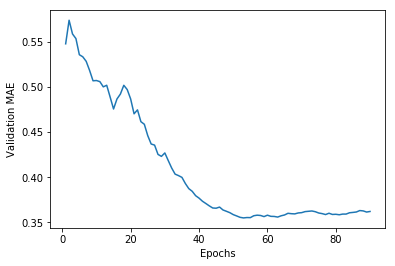

In [8]:
import matplotlib.pyplot as plt

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_hist = smooth_curve(average_mae_hist[10:])

plt.plot(range(1, len(smooth_mae_hist) + 1), smooth_mae_hist)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [49]:
model = build_model()
model.fit(X_train, Y_train, epochs=60, batch_size=32, verbose=0)
train_mse_scroe, train_mae_score = model.evaluate(X_train, Y_train)

15028/15028 [==============================] - 0s 17us/step


In [50]:
print("Train mae score: ", train_mae_score)

Train mae score:  1.4593533380316521


In [51]:
model_pred = np.expm1(model.predict(X_test))

In [52]:
model_pred

array([[101207.84 ],
       [ 83709.86 ],
       [356501.22 ],
       ...,
       [ 73544.664],
       [ 60855.242],
       [ 75391.28 ]], dtype=float32)

In [48]:
submission = pd.read_csv('./Input/sample_submission.csv')
submission['price'] = model_pred
submission.to_csv('./Output/submission_model.csv', index=False)

In [12]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import sklearn.preprocessing
from scipy.stats import spearmanr

from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

# Origin
ori_train = pd.read_csv('./Input/train.csv')
ori_test = pd.read_csv('./Input/test.csv')

# Data Load
df_train = pd.read_csv('./Input/train.csv')
df_test = pd.read_csv('./Input/test.csv')

# 이상치 제거
df_train = df_train.loc[df_train['id']!=456] # grade
df_train = df_train.loc[df_train['id']!=2302] # grade
df_train = df_train.loc[df_train['id']!=2777] # grade
df_train = df_train.loc[df_train['id']!=4123] # grade
df_train = df_train.loc[df_train['id']!=7259] # grade
df_train = df_train.loc[df_train['id']!=8990] # sqft_living
df_train = df_train.loc[df_train['id']!=1231] # living_ratio
df_train = df_train.loc[df_train['id']!=12209] # living_ratio
df_train = df_train.loc[df_train['id']!=12781] # living_ratio

# ID 처리
df_train.drop('id', axis=1, inplace=True)
df_test.drop('id', axis=1, inplace=True)

# 가격 정규화 (np.log1p)
df_train['price'] = df_train['price'].map(lambda x: np.log1p(x))

# 거래 년도
df_train['date'] = df_train['date'].apply(lambda x: str(x[0:8])).astype(int)
df_test['date'] = df_test['date'].apply(lambda x: str(x[0:8])).astype(int)

# 층 별 주거공간
df_train['sqft_living_floor'] = df_train['sqft_above'] / df_train['floors']
df_test['sqft_living_floor'] = df_test['sqft_above'] / df_test['floors']

# 부지 대비 건물 면적 비율
df_train['lot_living_ratio'] = df_train['sqft_living_floor']/df_train['sqft_lot']
df_test['lot_living_ratio'] = df_test['sqft_living_floor']/df_test['sqft_lot']

# 재건축 여부
df_train['is_renovated'] = df_train['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df_test['is_renovated'] = df_test['yr_renovated'].map(lambda x: 1 if x > 0 else 0)

# 최신 건축 년도
df_train['yr_renovated'] = np.maximum(df_train['yr_built'], df_train['yr_renovated'])
df_test['yr_renovated'] = np.maximum(df_test['yr_built'], df_test['yr_renovated'])

# 방의 총 갯수
df_train['totalrooms'] = df_train['bedrooms'] + df_train['bathrooms']
df_test['totalrooms'] = df_test['bedrooms'] + df_test['bathrooms']

'''
# 외관 점수
df_train['out_score'] = (df_train['view']+1) * df_train['grade']
df_test['out_score'] = (df_test['view']+1) * df_test['grade']

# 내관 점수
df_train['in_score'] = df_train['condition'] * df_train['grade']
df_test['in_score'] = df_test['condition'] * df_test['grade']

# 총괄 점수
df_train['total_score'] = df_train['out_score'] + df_train['in_score']
df_test['total_score'] = df_test['out_score'] + df_test['in_score']
'''

# 평균 대비 주거공간 비율
df_train['living15_ratio'] = df_train['sqft_living'] / df_train['sqft_living15']
df_test['living15_ratio'] = df_test['sqft_living'] / df_test['sqft_living15']

# 평균 대비 부지 비율
df_train['lot15_ratio'] = df_train['sqft_lot'] / df_train['sqft_lot15']
df_test['lot15_ratio'] = df_test['sqft_lot'] / df_test['sqft_lot15']

# 정규화
skew_columns = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'sqft_basement']
for col in skew_columns:
    df_train[col] = df_train[col].map(lambda x: np.log1p(x))
    df_test[col] = df_test[col].map(lambda x: np.log1p(x))

In [16]:
np.sort(df_train['zipcode'].unique())

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199], dtype=int64)

In [201]:
# 등급 단순화
def category_grade(x):
    if x < 4:
        return 1
    elif x < 7:
        return 2
    elif x < 9:
        return 3
    elif x < 11:
        return 4    
    else:
        return 5
    
df_train['grade_cat'] = df_train['grade'].apply(category_grade)
df_test['grade_cat'] = df_test['grade'].apply(category_grade)

# 외관 점수 (cat)
df_train['out_score_cat'] = (df_train['view']+1) * df_train['grade_cat']
df_test['out_score_cat'] = (df_test['view']+1) * df_test['grade_cat']

# 내관 점수 (cat)
df_train['in_score_cat'] = df_train['condition'] * df_train['grade_cat']
df_test['in_score_cat'] = df_test['condition'] * df_test['grade_cat']

# 총괄 점수 (cat)
df_train['total_score_cat'] = df_train['out_score_cat'] + df_train['in_score_cat']
df_test['total_score_cat'] = df_test['out_score_cat'] + df_test['in_score_cat']

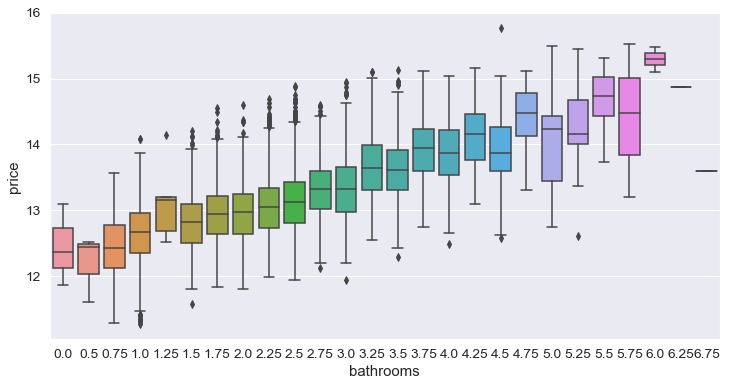

In [114]:
check = pd.concat([df_train['price'], df_train['bathrooms']], axis=1)
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x='bathrooms', y="price", data=check)

In [181]:
# 화장실 단순화
def category_bathrooms(x):
    if x == 0:
        return 0    
    elif x < 2:
        return 1
    elif x < 3:
        return 2
    elif x < 4:
        return 3
    elif x < 5:
        return 4
    elif x < 6:
        return 5
    elif x < 7:
        return 6
    else:
        return 7
    
df_train['bathrooms_cat'] = df_train['bathrooms'].apply(category_bathrooms)
df_test['bathrooms_cat'] = df_test['bathrooms'].apply(category_bathrooms)

In [202]:
# 경도 단순화
def category_long(x):
    if x < -122.5:
        return 0    
    elif x < -122.4:
        return 1
    elif x < -122.3:
        return 2
    elif x < -122.2:
        return 3
    elif x < -122.1:
        return 4
    else:
        return 5
    
df_train['long_cat'] = df_train['long'].apply(category_long).astype('object')
df_test['long_cat'] = df_test['long'].apply(category_long).astype('object')

In [197]:
df_train['lat'].describe()

count     15026
unique        6
top           2
freq       4925
Name: long_cat, dtype: int64

In [203]:
# 위도 단순화
def category_lat(x):
    if x < 47.2:
        return 0    
    elif x < 47.3:
        return 1
    elif x < 47.4:
        return 2
    elif x < 47.5:
        return 3
    elif x < 47.6:
        return 4
    elif x < 47.7:
        return 5
    else:
        return 6
    
df_train['lat_cat'] = df_train['lat'].apply(category_lat)
df_test['lat_cat'] = df_test['lat'].apply(category_lat)

In [127]:
df_train = df_train.loc[df_train['bathrooms_cat'] != 7]

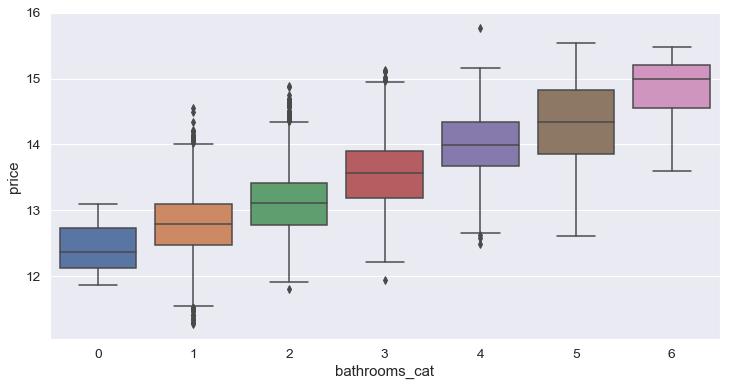

In [113]:
check = pd.concat([df_train['price'], df_train['bathrooms_cat']], axis=1)
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x='bathrooms_cat', y="price", data=check)

In [204]:
# 방 점수 (cat)
df_train['bathrrooms_score_cat'] = df_train['bathrooms'] * df_train['grade_cat']
df_test['bathrrooms_score_cat'] = df_test['bathrooms'] * df_test['grade_cat']
df_train['bedrooms_score_cat'] = df_train['bedrooms'] * df_train['grade_cat']
df_test['bedrooms_score_cat'] = df_test['bedrooms'] * df_test['grade_cat']
df_train['totalrooms_score_cat'] = df_train['totalrooms'] * df_train['grade_cat']
df_test['totalrooms_score_cat'] = df_test['totalrooms'] * df_test['grade_cat']

In [8]:
# 위도 단순화
def category_zipcode(x):
    if x < 98020:
        return 0    
    elif x < 98040:
        return 1
    elif x < 98060:
        return 2
    elif x < 98080:
        return 3
    elif x < 98100:
        return 4
    elif x < 98120:
        return 5
    elif x < 98140:
        return 6
    elif x < 98160:
        return 7
    elif x < 98180:
        return 8
    else:
        return 9
    
df_train['zipcode_cat'] = df_train['zipcode'].apply(category_zipcode)

In [9]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = df_train.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)

Find most important features relative to target
price                1.000000
grade                0.707904
sqft_living          0.677560
sqft_living15        0.608938
sqft_above           0.591225
bathrooms            0.551938
totalrooms           0.511777
lat                  0.444469
sqft_living_floor    0.419308
bedrooms             0.359753
view                 0.347565
floors               0.317615
living15_ratio       0.303202
sqft_basement        0.231755
waterfront           0.172645
sqft_lot             0.146211
sqft_lot15           0.129219
yr_renovated         0.128591
is_renovated         0.126664
yr_built             0.076314
lot_living_ratio     0.060773
long                 0.055053
lot15_ratio          0.050151
condition            0.042916
date                 0.009485
zipcode             -0.039373
zipcode_cat         -0.044306
Name: price, dtype: float64


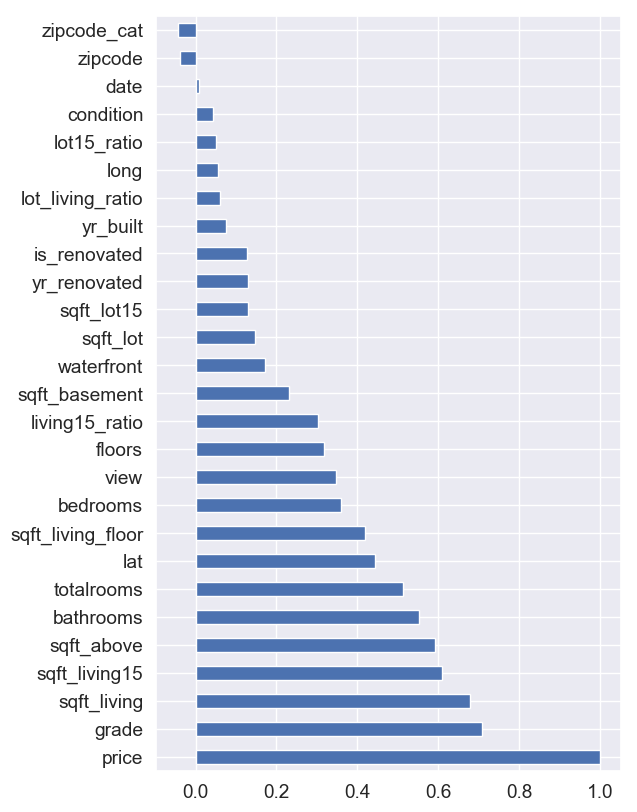

In [11]:
fig, ax = plt.subplots(figsize=(6.0, 10.0), dpi=100)
corr.price.plot(kind='barh', ax=ax)
plt.show()

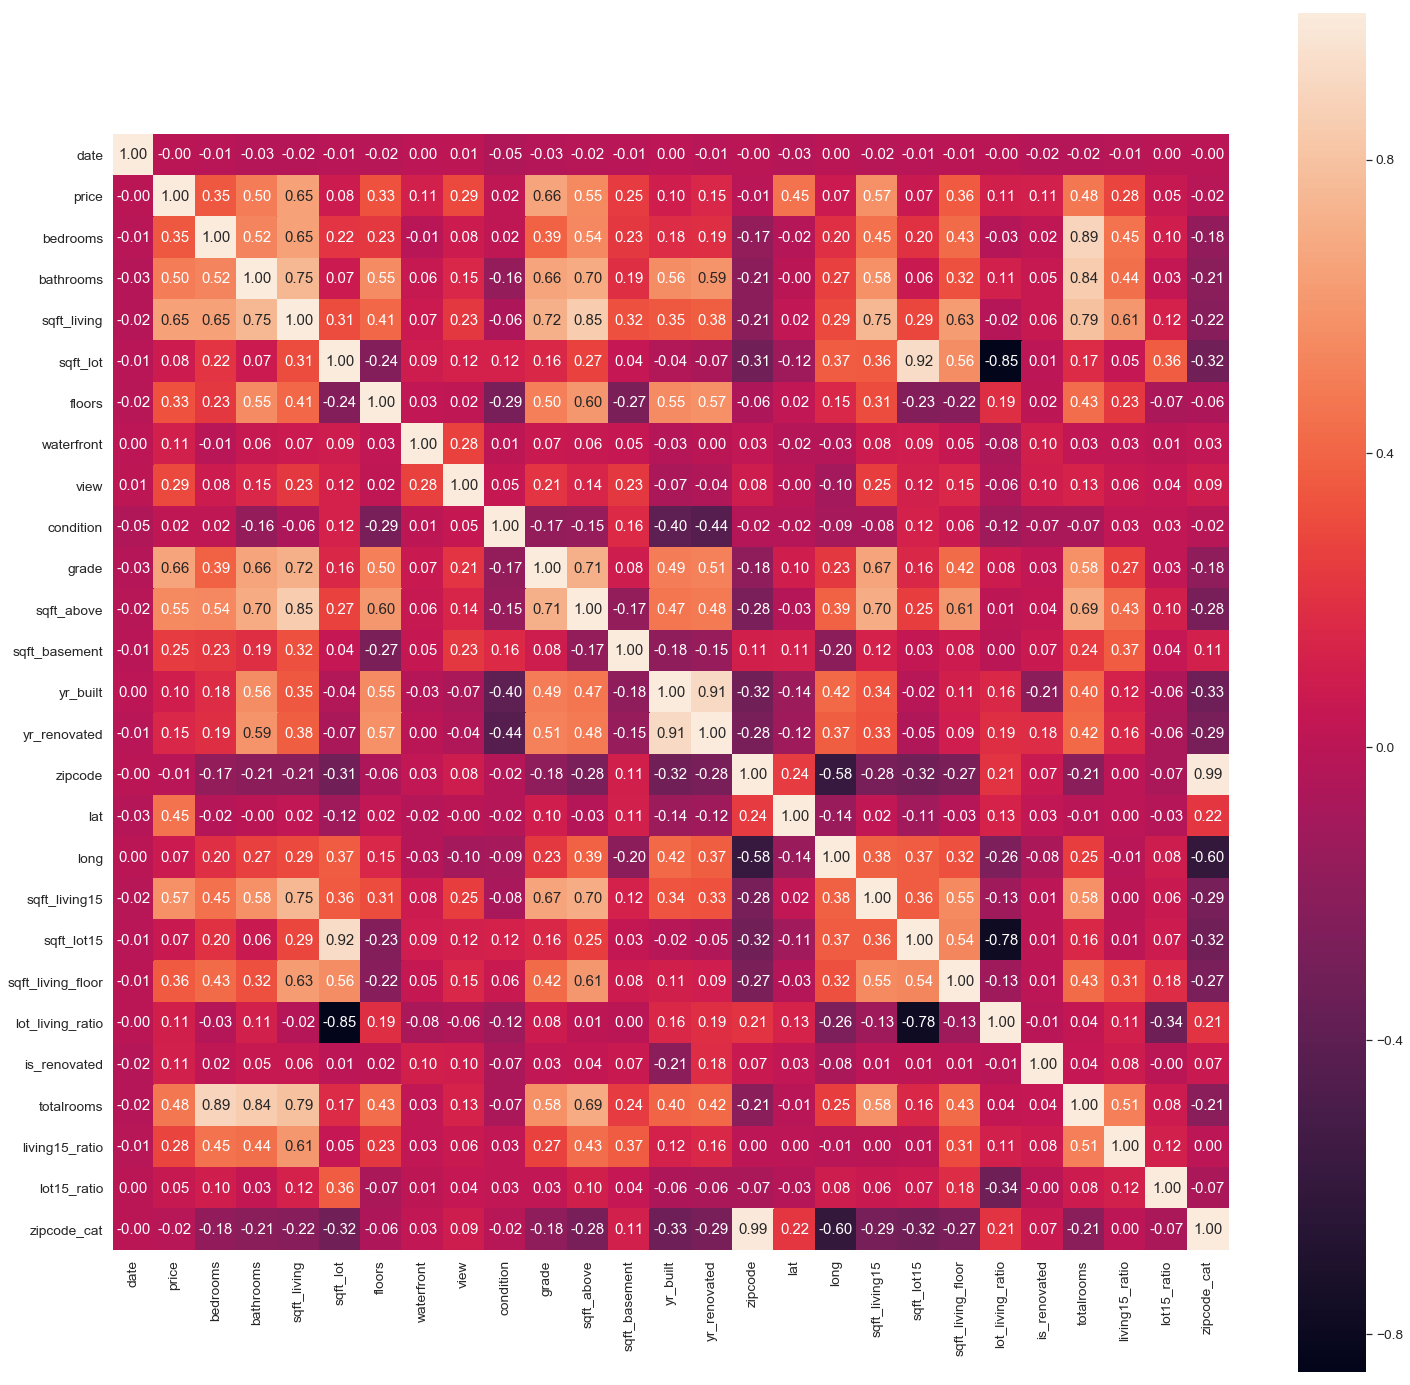

In [10]:
plt.figure(figsize=(25,25))
sns.set(font_scale=1.25)
sns.heatmap(df_train.corr(method='spearman'),fmt='.2f', annot=True, square=True , annot_kws={'size' : 15})

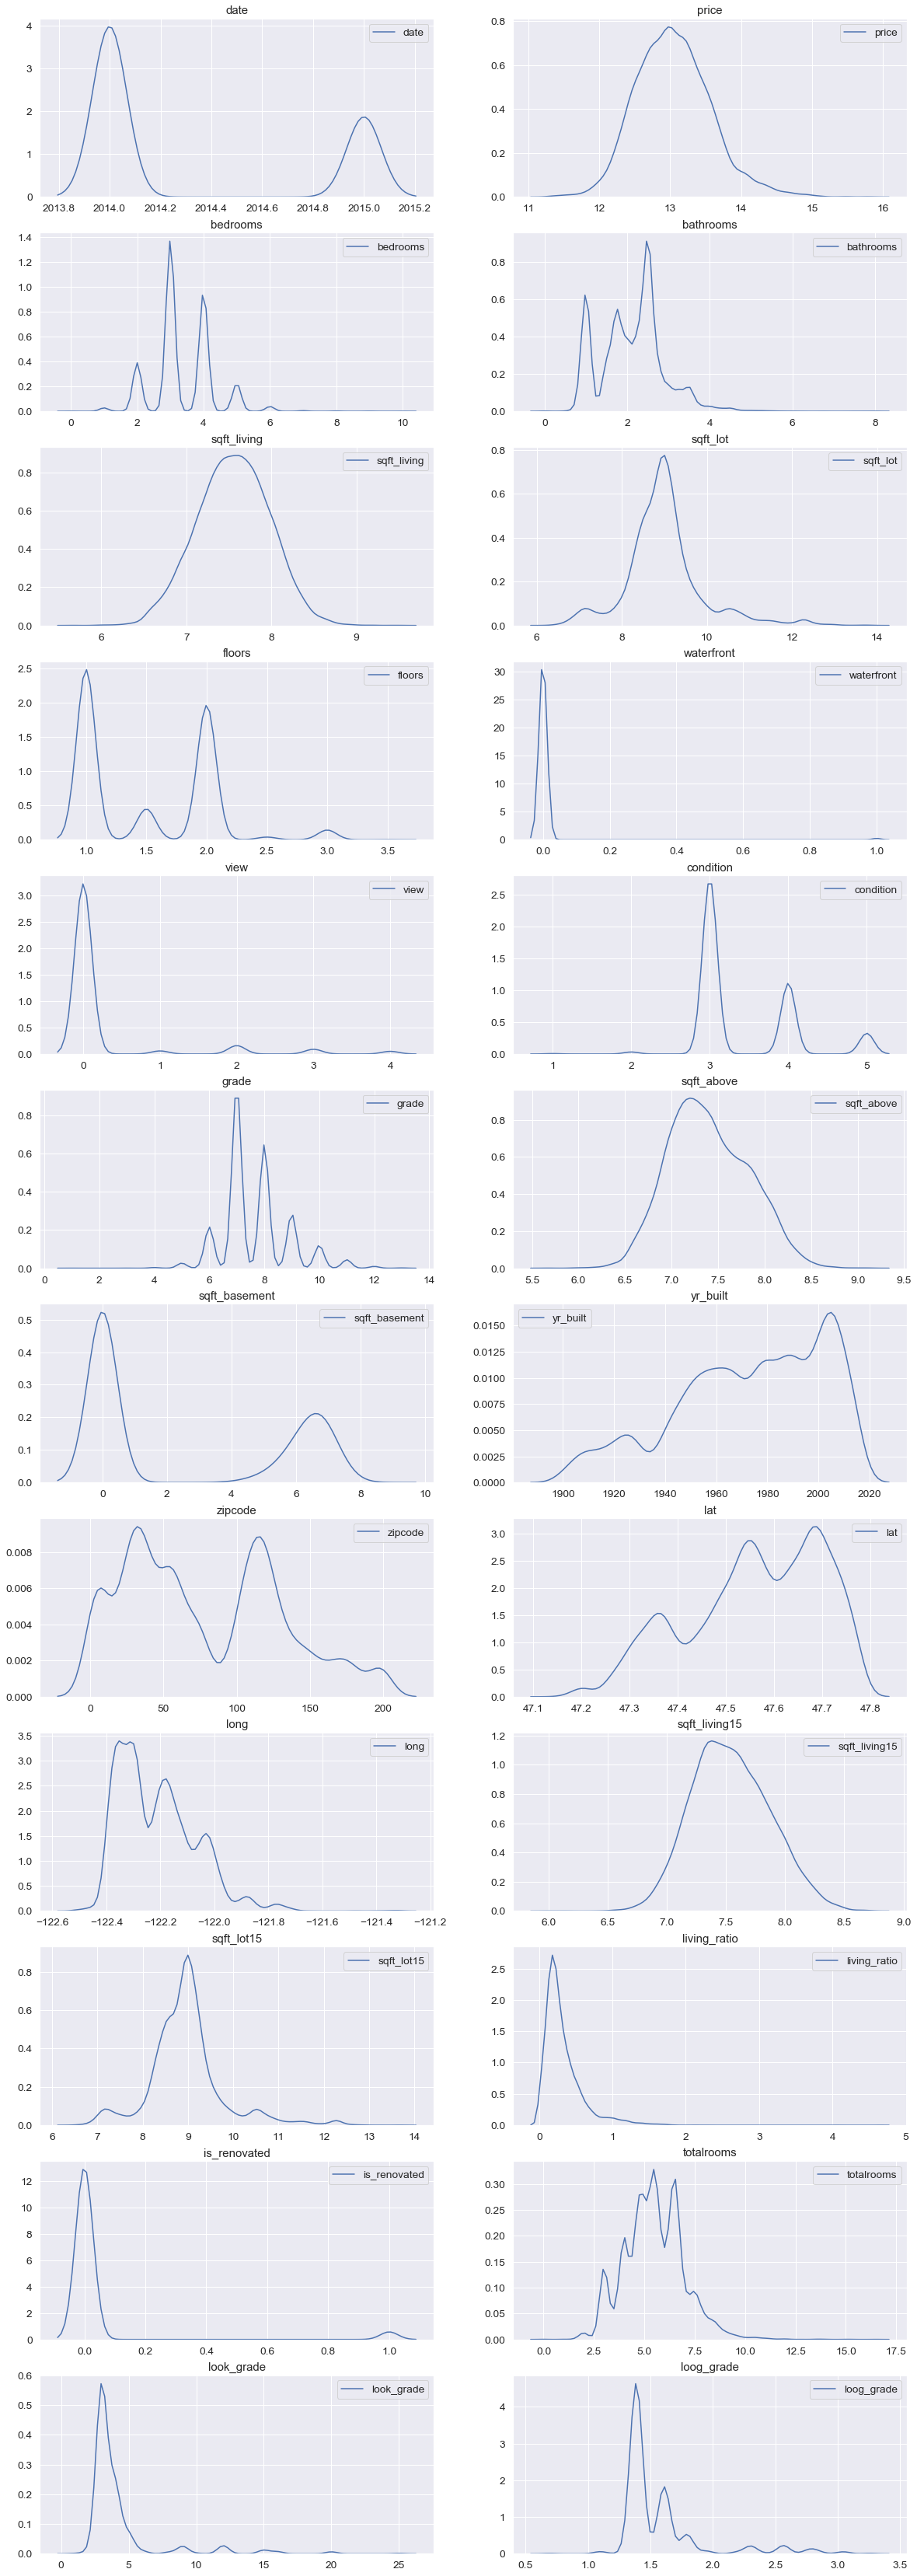

In [170]:
fig, ax = plt.subplots(12, 2, figsize=(20, 60))

count = 0
columns = df_train.columns
for row in range(12):
    for col in range(2):
        sns.kdeplot(df_train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1
        if count == 24:
            break

In [130]:
# 값 나누기
Y_train = df_train['price']
df_train.drop('price', axis=1, inplace=True)
X_train = df_train
X_test = df_test

In [121]:
# Cross validation strategy
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

def cv_score(model):
    print("Model CV score : {:.4f}".format(np.mean(cross_val_score(model, X_train, Y_train)), 
                                         kf=kfold))

def rmsle_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv=kf))
    return rmse
    
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)

In [122]:
gboost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features="sqrt", min_samples_leaf=15, min_samples_split=10, loss="huber", random_state=42)
#gboost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features="sqrt", min_samples_leaf=20, min_samples_split=12, loss="huber", random_state=42)
model_lgb = lgb.LGBMRegressor(n_estimators=5000, learning_rate=0.01, max_depth=4, objective='regression', num_leaves=31, min_data_in_leaf=30, min_child_samples=20, boosting="gbdt", feature_fraction=0.9, bagging_freq=1, bagging_fraction=0.9, bagging_seed=11, metric='rmse', lambda_l1=0.1, nthread=4, random_state=4950)
averaged_models = AveragingModels(models = (gboost, model_lgb))

In [131]:
score3 = rmsle_cv(gboost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))
score4 = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))
score5 = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score5.mean(), score5.std()))

Gradient Boosting score: 0.1608 (0.0028)

LGBM score: 0.1601 (0.0032)

Averaged base models score: 0.1588 (0.0030)



In [163]:
gboost.fit(X_train, Y_train)
gboost_train_pred = gboost.predict(X_train)
gboost_pred = np.expm1(gboost.predict(X_test))
print(rmsle(Y_train, gboost_train_pred))

0.10904166217805956


In [164]:
model_lgb.fit(X_train, Y_train)
lgb_train_pred = model_lgb.predict(X_train)
lgb_pred = np.expm1(model_lgb.predict(X_test))
print(rmsle(Y_train, lgb_train_pred))

0.12605984159589279


In [165]:
averaged_models.fit(X_train, Y_train)
avg_train_pred = averaged_models.predict(X_train)
avg_pred = np.expm1(averaged_models.predict(X_test))
print(rmsle(Y_train, avg_train_pred))

0.11580080763850424


In [166]:
ens_train_pred = gboost_train_pred * 0.7 + lgb_train_pred * 0.15 + avg_train_pred * 0.15
ens_pred = gboost_pred * 0.7 + lgb_pred * 0.15 + avg_pred * 0.15
print(rmsle(Y_train, ens_train_pred))

0.11160188666625007


In [167]:
submission1 = pd.read_csv('./Input/sample_submission.csv')
submission1['price'] = gboost_pred
submission1.to_csv('./Output/submission_gboost.csv', index=False)
submission2 = pd.read_csv('./Input/sample_submission.csv')
submission2['price'] = ens_pred
submission2.to_csv('./Output/submission_ensemble.csv', index=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


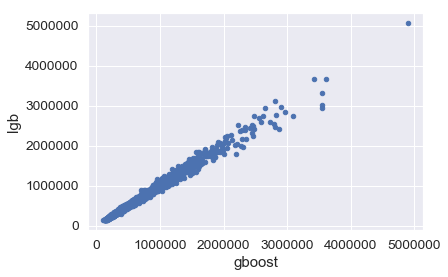

In [168]:
predictions1 = pd.DataFrame({"gboost": gboost_pred, "lgb": lgb_pred})
predictions1.plot(x="gboost", y="lgb", kind="scatter")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


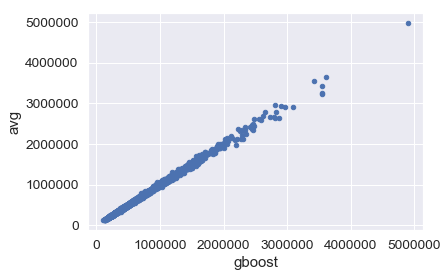

In [169]:
predictions2 = pd.DataFrame({"gboost": gboost_pred, "avg": avg_pred})
predictions2.plot(x="gboost", y="avg", kind="scatter")

In [19]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV, LassoCV, LassoLarsCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

# Origin
ori_train = pd.read_csv('./Input/train.csv')
ori_test = pd.read_csv('./Input/test.csv')

# Data Load
df_train = pd.read_csv('./Input/train.csv')
df_test = pd.read_csv('./Input/test.csv')

# 이상치 제거
#df_train = df_train.loc[df_train['id']!=2302] # grade 3
df_train = df_train.loc[df_train['id']!=4123] # grade 3
df_train = df_train.loc[df_train['id']!=2775] # grade 11
df_train = df_train.loc[df_train['id']!=8912] # sqft_living > 13000

# ID 제거
df_train.drop("id", axis=1, inplace=True)
df_test.drop("id", axis=1, inplace=True)


# 데이터 타입 변경
#object_feats = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
#df_train[object_feats] = df_train[object_feats].astype('object')

# 거래 년도
df_train['year'] = df_train['date'].apply(lambda x: str(x[0:4])).astype(int)
df_test['year'] = df_test['date'].apply(lambda x: str(x[0:4])).astype(int)
le1 = LabelEncoder()
le1.fit(df_train['year'])
le1.fit(df_test['year'])
df_train['year'] = le1.transform(df_train['year'])
df_test['year'] = le1.transform(df_test['year'])

# 거래 년월
df_train['yearmm'] = df_train['date'].apply(lambda x: str(x[0:6])).astype(int)
df_test['yearmm'] = df_test['date'].apply(lambda x: str(x[0:6])).astype(int)
le2 = LabelEncoder()
le2.fit(df_train['yearmm'])
le2.fit(df_test['yearmm'])
df_train['yearmm'] = le2.transform(df_train['yearmm'])
df_test['yearmm'] = le2.transform(df_test['yearmm'])

# 거래 날짜
df_train['date'] = df_train['date'].apply(lambda x: str(x[0:8])).astype(int)
df_test['date'] = df_test['date'].apply(lambda x: str(x[0:8])).astype(int)

# 우편번호 카테고리화
le3 = LabelEncoder()
le3.fit(df_train['zipcode'])
le3.fit(df_test['zipcode'])
df_train['zipcode'] = le3.transform(df_train['zipcode'])
df_test['zipcode'] = le3.transform(df_test['zipcode'])

# 재건축 여부
df_train['is_renovated'] = df_train['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df_test['is_renovated'] = df_test['yr_renovated'].map(lambda x: 1 if x > 0 else 0)

# 최신 건축 년도
df_train['yr_renovated'] = np.maximum(df_train['yr_built'], df_train['yr_renovated'])
df_test['yr_renovated'] = np.maximum(df_test['yr_built'], df_test['yr_renovated'])

# 방의 총 갯수
df_train['totalrooms'] = df_train['bedrooms'] + df_train['bathrooms']
df_test['totalrooms'] = df_test['bedrooms'] + df_test['bathrooms']

## 부지 활용도
#df_train['living_lot_ratio'] = df_train['sqft_living'] / df_train['sqft_lot']
#df_test['living_lot_ratio'] = df_test['sqft_living'] / df_test['sqft_lot']

# 층 별 주거공간
df_train['sqft_living_floor'] = df_train['sqft_above'] / df_train['floors']
df_test['sqft_living_floor'] = df_test['sqft_above'] / df_test['floors']

# 부지 대비 건물 면적 비율
df_train['sqft_building_ratio'] = df_train['sqft_living_floor'] / df_train['sqft_lot']
df_test['sqft_building_ratio'] = df_test['sqft_living_floor'] / df_test['sqft_lot']

# 평균 대비 주거공간 비율
df_train['living15_ratio'] = (df_train['sqft_living'] / df_train['sqft_living15'])
df_test['living15_ratio'] = (df_test['sqft_living'] / df_test['sqft_living15'])

# 평균 대비 부지 비율
df_train['lot15_ratio'] = df_train['sqft_lot'] / df_train['sqft_lot15']
df_test['lot15_ratio'] = df_test['sqft_lot'] / df_test['sqft_lot15']

# 위도 단순화
def category_lat(x):
    if x < 47.2:
        return 0    
    elif x < 47.3:
        return 1
    elif x < 47.4:
        return 2
    elif x < 47.5:
        return 3
    elif x < 47.6:
        return 4
    elif x < 47.7:
        return 5
    else:
        return 6
    
df_train['lat_cat'] = df_train['lat'].apply(category_lat)
df_test['lat_cat'] = df_test['lat'].apply(category_lat)

# 경도 단순화
def category_long(x):
    if x < -122.5:
        return 0    
    elif x < -122.4:
        return 1
    elif x < -122.3:
        return 2
    elif x < -122.2:
        return 3
    elif x < -122.1:
        return 4
    else:
        return 5
    
df_train['long_cat'] = df_train['long'].apply(category_long)
df_test['long_cat'] = df_test['long'].apply(category_long)

# 위치 카테고리
df_train['location_cat'] = df_train['lat_cat']*6 + df_train['long_cat']
df_test['location_cat'] = df_test['lat_cat']*6 + df_test['long_cat']

# 등급 단순화
def category_grade(x):
    if x < 4:
        return 1
    elif x < 7:
        return 2
    elif x < 9:
        return 3
    elif x < 11:
        return 4    
    else:
        return 5
    
df_train['grade_cat'] = df_train['grade'].apply(category_grade)
df_test['grade_cat'] = df_test['grade'].apply(category_grade)

# 외관 점수 (cat)
df_train['out_score_cat'] = (df_train['view']+1) * df_train['grade_cat']
df_test['out_score_cat'] = (df_test['view']+1) * df_test['grade_cat']

# 내관 점수 (cat)
df_train['in_score_cat'] = df_train['condition'] * df_train['grade_cat']
df_test['in_score_cat'] = df_test['condition'] * df_test['grade_cat']

# 총괄 점수 (cat)
df_train['total_score_cat'] = df_train['out_score_cat'] + df_train['in_score_cat']
df_test['total_score_cat'] = df_test['out_score_cat'] + df_test['in_score_cat']

# 침실 점수 (cat)
df_train['bedrooms_score_cat'] = df_train['bedrooms'] * df_train['grade_cat']
df_test['bedrooms_score_cat'] = df_test['bedrooms'] * df_test['grade_cat']

# 화장실 점수 (cat)
df_train['bathrooms_score_cat'] = df_train['bathrooms'] * df_train['grade_cat']
df_test['bathrooms_score_cat'] = df_test['bathrooms'] * df_test['grade_cat']

# 방 점수 (cat)
df_train['totalrooms_score_cat'] = df_train['totalrooms'] * df_train['grade_cat']
df_test['totalrooms_score_cat'] = df_test['totalrooms'] * df_test['grade_cat']

# 정규화
skew_columns = ['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'living15_ratio', 'lot15_ratio']
for col in skew_columns:
    df_train[col] = df_train[col].map(lambda x: np.log1p(x))
    df_test[col] = df_test[col].map(lambda x: np.log1p(x))

# 가격 정규화 (np.log1p)
df_train['price'] = df_train['price'].map(lambda x: np.log1p(x))    
    
# Drop features
df_train.drop(['grade_cat', 'bedrooms_score_cat', 'bathrooms_score_cat'], axis=1, inplace=True)
df_test.drop(['grade_cat', 'bedrooms_score_cat', 'bathrooms_score_cat'], axis=1, inplace=True)    

## One-hot encoding
#obj_feats = df_train.dtypes[df_train.dtypes == 'object'].index
#for col in obj_feats:
#    df_train = pd.get_dummies(df_train, columns=[col], prefix=col)
#    df_test = pd.get_dummies(df_test, columns=[col], prefix=col)


In [20]:
df_train['sqft_price_ratio'] = (df_train['price']) / (df_train['sqft_living'] + df_train['sqft_lot']) 

loc_price = df_train.groupby(['location_cat'])['sqft_price_ratio'].agg({'mean'}).reset_index()
df_train = pd.merge(df_train, loc_price, how='left', on='location_cat')
df_test = pd.merge(df_test, loc_price, how='left', on='location_cat')
df_train['location_price'] = df_train['mean']
df_test['location_price'] = df_test['mean']

In [21]:
df_train['location_price']

0        0.807944
1        0.784240
2        0.767616
3        0.753884
4        0.761499
5        0.795395
6        0.834756
7        0.784240
8        0.767616
9        0.859637
10       0.819067
11       0.753566
12       0.859637
13       0.754665
14       0.753884
15       0.795361
16       0.807944
17       0.756557
18       0.756557
19       0.754665
20       0.859637
21       0.859637
22       0.792546
23       0.859637
24       0.859637
25       0.767558
26       0.859637
27       0.859637
28       0.754665
29       0.784440
           ...   
15002    0.819067
15003    0.784440
15004    0.792546
15005    0.859637
15006    0.754259
15007    0.819067
15008    0.807944
15009    0.859637
15010    0.792546
15011    0.859637
15012    0.859637
15013    0.762160
15014    0.859637
15015    0.795361
15016    0.859637
15017    0.762160
15018    0.767616
15019    0.784440
15020    0.756557
15021    0.767558
15022    0.807944
15023    0.767616
15024    0.795395
15025    0.859637
15026    0

In [22]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = df_train.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)

Find most important features relative to target
price                   1.000000
grade                   0.707187
sqft_living             0.676756
totalrooms_score_cat    0.656953
total_score_cat         0.610871
sqft_living15           0.608662
sqft_above              0.590389
bathrooms               0.551286
in_score_cat            0.533463
totalrooms              0.511019
out_score_cat           0.482437
location_cat            0.448392
lat                     0.444585
lat_cat                 0.434581
sqft_living_floor       0.417660
location_price          0.381774
mean                    0.381774
bedrooms                0.359104
view                    0.346467
floors                  0.317358
living15_ratio          0.310677
sqft_price_ratio        0.243581
sqft_basement           0.231328
waterfront              0.169531
sqft_lot                0.144429
yr_renovated            0.128321
sqft_lot15              0.127534
is_renovated            0.125879
yr_built                0.07

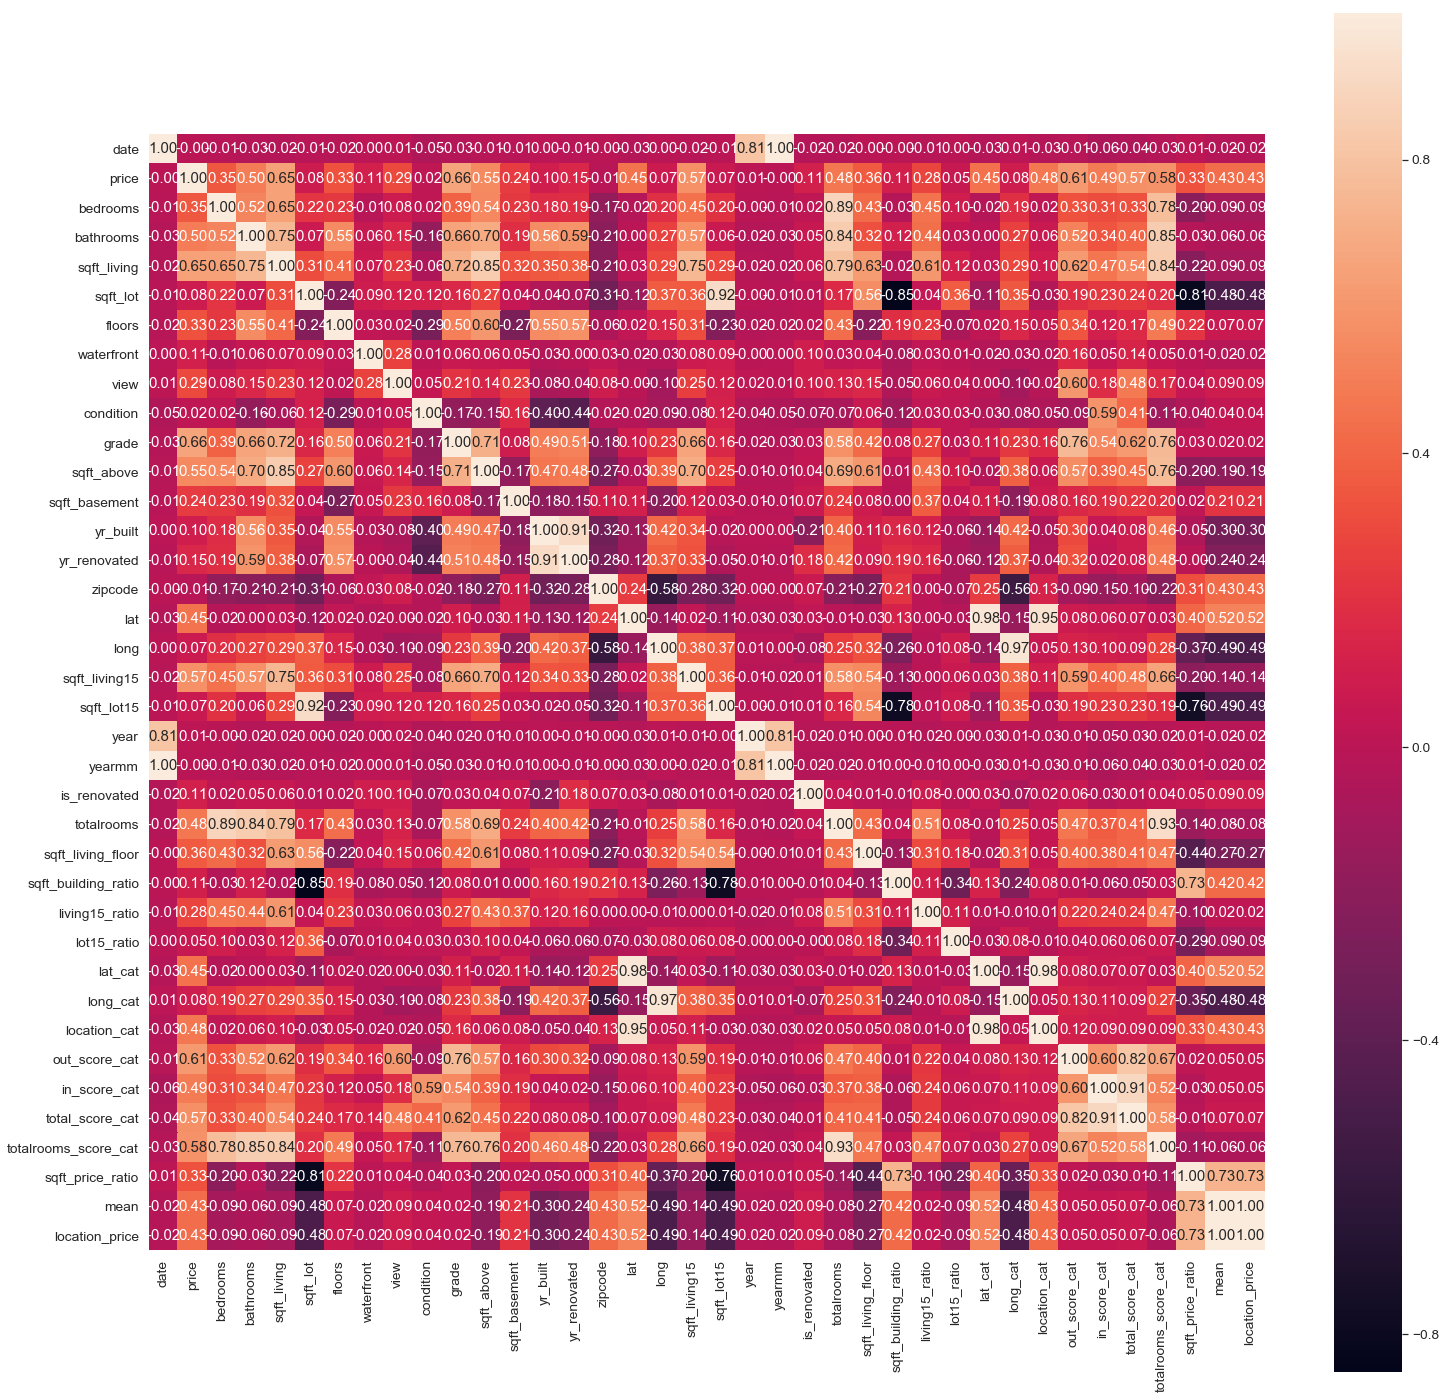

In [23]:
plt.figure(figsize=(25,25))
sns.set(font_scale=1.25)
sns.heatmap(df_train.corr(method='spearman'),fmt='.2f', annot=True, square=True , annot_kws={'size' : 15})

In [7]:
df_train.groupby(['location_cat']).mean()['price']

location_cat
5     12.592035
8     12.516168
9     12.434180
10    12.643561
11    12.660587
12    13.073788
13    13.096835
14    12.526961
15    12.475389
16    12.622097
17    12.688241
18    12.859857
19    13.055050
20    12.649671
21    12.501925
22    12.710782
23    13.004242
25    13.343879
26    12.873921
27    13.183953
28    13.379510
29    13.297202
31    13.701169
32    13.300091
33    13.710951
34    13.357601
35    13.350645
38    12.920365
39    13.051074
40    13.178567
41    13.157219
Name: price, dtype: float64

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV, LassoCV, LassoLarsCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

# Origin
ori_train = pd.read_csv('./Input/train.csv')
ori_test = pd.read_csv('./Input/test.csv')

# Data Load
df_train = pd.read_csv('./Input/train.csv')
df_test = pd.read_csv('./Input/test.csv')

# 이상치 제거
#df_train = df_train.loc[df_train['id']!=2302] # grade 3
df_train = df_train.loc[df_train['id']!=4123] # grade 3
df_train = df_train.loc[df_train['id']!=2775] # grade 11
df_train = df_train.loc[df_train['id']!=8912] # sqft_living > 13000

# ID 제거
df_train.drop("id", axis=1, inplace=True)
df_test.drop("id", axis=1, inplace=True)

# 가격 정규화 (np.log1p)
df_train['price'] = df_train['price'].map(lambda x: np.log1p(x))

# 데이터 타입 변경
#object_feats = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
#df_train[object_feats] = df_train[object_feats].astype('object')

# 거래 년도
df_train['year'] = df_train['date'].apply(lambda x: str(x[0:4])).astype(int)
df_test['year'] = df_test['date'].apply(lambda x: str(x[0:4])).astype(int)
le1 = LabelEncoder()
le1.fit(df_train['year'])
le1.fit(df_test['year'])
df_train['year'] = le1.transform(df_train['year'])
df_test['year'] = le1.transform(df_test['year'])

# 거래 년월
df_train['yearmm'] = df_train['date'].apply(lambda x: str(x[0:6])).astype(int)
df_test['yearmm'] = df_test['date'].apply(lambda x: str(x[0:6])).astype(int)
le2 = LabelEncoder()
le2.fit(df_train['yearmm'])
le2.fit(df_test['yearmm'])
df_train['yearmm'] = le2.transform(df_train['yearmm'])
df_test['yearmm'] = le2.transform(df_test['yearmm'])

# 거래 날짜
df_train['date'] = df_train['date'].apply(lambda x: str(x[0:8])).astype(int)
df_test['date'] = df_test['date'].apply(lambda x: str(x[0:8])).astype(int)

# 우편번호 카테고리화
le3 = LabelEncoder()
le3.fit(df_train['zipcode'])
le3.fit(df_test['zipcode'])
df_train['zipcode'] = le3.transform(df_train['zipcode'])
df_test['zipcode'] = le3.transform(df_test['zipcode'])

# 재건축 여부
df_train['is_renovated'] = df_train['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df_test['is_renovated'] = df_test['yr_renovated'].map(lambda x: 1 if x > 0 else 0)

# 최신 건축 년도
df_train['yr_renovated'] = np.maximum(df_train['yr_built'], df_train['yr_renovated'])
df_test['yr_renovated'] = np.maximum(df_test['yr_built'], df_test['yr_renovated'])

# 방의 총 갯수
df_train['totalrooms'] = df_train['bedrooms'] + df_train['bathrooms']
df_test['totalrooms'] = df_test['bedrooms'] + df_test['bathrooms']

## 부지 활용도
#df_train['living_lot_ratio'] = df_train['sqft_living'] / df_train['sqft_lot']
#df_test['living_lot_ratio'] = df_test['sqft_living'] / df_test['sqft_lot']

# 층 별 주거공간
df_train['sqft_living_floor'] = df_train['sqft_above'] / df_train['floors']
df_test['sqft_living_floor'] = df_test['sqft_above'] / df_test['floors']

# 부지 대비 건물 면적 비율
df_train['sqft_building_ratio'] = df_train['sqft_living_floor'] / df_train['sqft_lot']
df_test['sqft_building_ratio'] = df_test['sqft_living_floor'] / df_test['sqft_lot']

# 평균 대비 주거공간 비율
df_train['living15_ratio'] = (df_train['sqft_living'] / df_train['sqft_living15'])
df_test['living15_ratio'] = (df_test['sqft_living'] / df_test['sqft_living15'])

# 평균 대비 부지 비율
df_train['lot15_ratio'] = df_train['sqft_lot'] / df_train['sqft_lot15']
df_test['lot15_ratio'] = df_test['sqft_lot'] / df_test['sqft_lot15']

# 위도 단순화
def category_lat(x):
    if x < 47.2:
        return 0    
    elif x < 47.3:
        return 1
    elif x < 47.4:
        return 2
    elif x < 47.5:
        return 3
    elif x < 47.6:
        return 4
    elif x < 47.7:
        return 5
    else:
        return 6
    
df_train['lat_cat'] = df_train['lat'].apply(category_lat)
df_test['lat_cat'] = df_test['lat'].apply(category_lat)

# 경도 단순화
def category_long(x):
    if x < -122.5:
        return 0    
    elif x < -122.4:
        return 1
    elif x < -122.3:
        return 2
    elif x < -122.2:
        return 3
    elif x < -122.1:
        return 4
    else:
        return 5
    
df_train['long_cat'] = df_train['long'].apply(category_long)
df_test['long_cat'] = df_test['long'].apply(category_long)

# 등급 단순화
def category_grade(x):
    if x < 4:
        return 1
    elif x < 7:
        return 2
    elif x < 9:
        return 3
    elif x < 11:
        return 4    
    else:
        return 5
    
df_train['grade_cat'] = df_train['grade'].apply(category_grade)
df_test['grade_cat'] = df_test['grade'].apply(category_grade)

# 외관 점수 (cat)
df_train['out_score_cat'] = (df_train['view']+1) * df_train['grade_cat']
df_test['out_score_cat'] = (df_test['view']+1) * df_test['grade_cat']

# 내관 점수 (cat)
df_train['in_score_cat'] = df_train['condition'] * df_train['grade_cat']
df_test['in_score_cat'] = df_test['condition'] * df_test['grade_cat']

# 총괄 점수 (cat)
df_train['total_score_cat'] = df_train['out_score_cat'] + df_train['in_score_cat']
df_test['total_score_cat'] = df_test['out_score_cat'] + df_test['in_score_cat']

# 침실 점수 (cat)
df_train['bedrooms_score_cat'] = df_train['bedrooms'] * df_train['grade_cat']
df_test['bedrooms_score_cat'] = df_test['bedrooms'] * df_test['grade_cat']

# 화장실 점수 (cat)
df_train['bathrooms_score_cat'] = df_train['bathrooms'] * df_train['grade_cat']
df_test['bathrooms_score_cat'] = df_test['bathrooms'] * df_test['grade_cat']

# 방 점수 (cat)
df_train['totalrooms_score_cat'] = df_train['totalrooms'] * df_train['grade_cat']
df_test['totalrooms_score_cat'] = df_test['totalrooms'] * df_test['grade_cat']

# 정규화
skew_columns = ['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'living15_ratio', 'lot15_ratio']
for col in skew_columns:
    df_train[col] = df_train[col].map(lambda x: np.log1p(x))
    df_test[col] = df_test[col].map(lambda x: np.log1p(x))
        
# Drop features
df_train.drop(['grade_cat', 'bedrooms_score_cat', 'bathrooms_score_cat'], axis=1, inplace=True)
df_test.drop(['grade_cat', 'bedrooms_score_cat', 'bathrooms_score_cat'], axis=1, inplace=True)    

## One-hot encoding
#obj_feats = df_train.dtypes[df_train.dtypes == 'object'].index
#for col in obj_feats:
#    df_train = pd.get_dummies(df_train, columns=[col], prefix=col)
#    df_test = pd.get_dummies(df_test, columns=[col], prefix=col)

# 값 나누기
Y_train = df_train['price']
Y_check = np.expm1(Y_train)
df_train.drop('price', axis=1, inplace=True)
X_train = df_train
X_test = df_test

# Cross validation strategy
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv=kf))
    return rmse
    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
    
# 모델 생성
gboost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.05, max_depth=4, max_features="sqrt", min_samples_leaf=15, min_samples_split=10, loss="huber", random_state=64)
model_xgb = xgb.XGBRegressor(n_estimators=2500, learning_rate=0.05, max_depth=4, objective="reg:linear", eval_metric='rmse', colsample_bytree=0.8, gamma=0.05, min_child_weight=1.8, reg_alpha=0.5, subsample=0.8, silent=1, random_state=64, nthread=-1)
model_lgb = lgb.LGBMRegressor(n_estimators=3000, learning_rate=0.015, max_depth=4, objective="regression", num_leaves=31, min_data_in_leaf=30, min_child_samples=20, boosting="gbdt", feature_fraction=0.9, bagging_freq=1, bagging_fraction=0.9, bagging_seed=11, metric='rmse', lambda_l1=0.1, nthread=4, random_state=64)

gboost.fit(X_train, Y_train)
gboost_train_pred = np.expm1(gboost.predict(X_train))
gboost_pred = np.expm1(gboost.predict(X_test))
print("RMSE(GradientBoosting): {:.6f}".format(rmse(Y_check, gboost_train_pred)))

model_xgb.fit(X_train, Y_train)
xgb_train_pred = np.expm1(model_xgb.predict(X_train))
xgb_pred = np.expm1(model_xgb.predict(X_test))
print("RMSE(XGB):              {:.6f}".format(rmse(Y_check, xgb_train_pred)))

model_lgb.fit(X_train, Y_train)
lgb_train_pred = np.expm1(model_lgb.predict(X_train))
lgb_pred = np.expm1(model_lgb.predict(X_test))
print("RMSE(LightGBM):         {:.6f}".format(rmse(Y_check, lgb_train_pred)))

ensemble_train_pred = gboost_train_pred * 0.7 + xgb_train_pred * 0.15 + lgb_train_pred * 0.15
ensemble_pred = gboost_pred * 0.7 + xgb_pred * 0.15 + lgb_pred * 0.15
print("RMSE(EnsembleModel):    {:.6f}".format(rmse(Y_check, ensemble_train_pred)))